In [61]:
import pandas as pd
import numpy as np

In [62]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [64]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [65]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [66]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [67]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

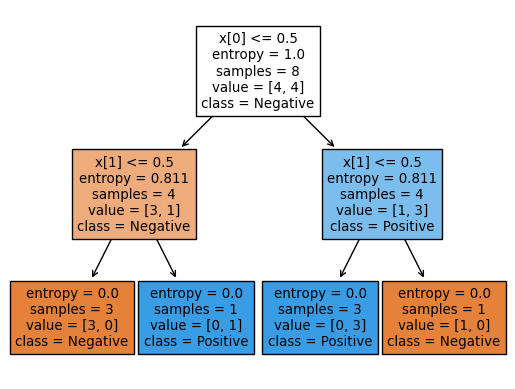

In [68]:
from sklearn.tree import plot_tree
plot_tree(clf,filled=True, class_names=['Negative', 'Positive']);

In [69]:
dogs = pd.read_csv('data\dogs.csv', index_col=0)
dogs

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [70]:
dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

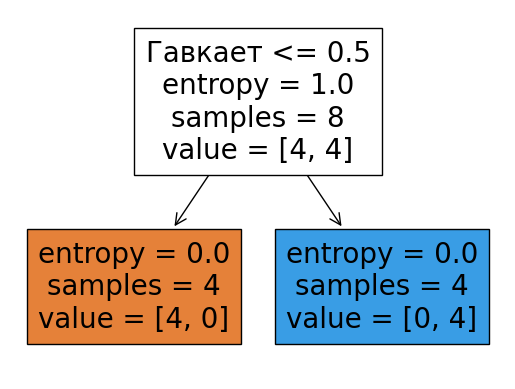

In [71]:
dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, filled=True, feature_names=list(dogs_X.columns));

In [76]:
cats = pd.read_csv('data\cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


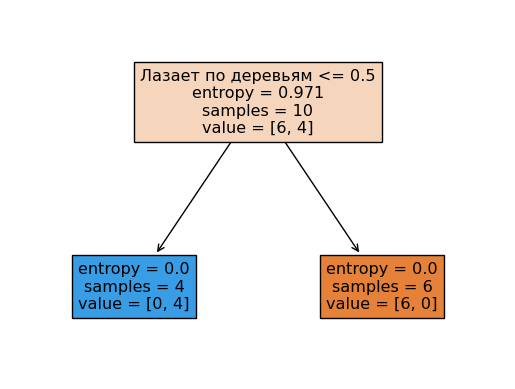

In [85]:
# А вот так нужно сделать
# cats_X = cats[["Шерстист"]]                # Первая картинка с деревом
# cats_X = cats[["Гавкает"]]               # Воторая картинка с деревом
# cats_X = cats[["Лазает по деревьям"]]    # Третья картинка с деревом       
cats_X = cats[["Шерстист", "Гавкает", "Лазает по деревьям"]]

# Ну и собственно обучение на дереве
cats_y = cats["Вид"]

classifier = tree.DecisionTreeClassifier(criterion='entropy')

classifier.fit(cats_X, cats_y)

plot_tree(classifier, feature_names=cats_X.columns, filled=True);

In [93]:
0.971 - (9 / 10) * 0.991

0.07909999999999995

In [94]:
0.971 - (5 / 10) * 0.772

0.585

In [95]:
0.971 - (6 / 10) * 0.971

0.38839999999999997

In [96]:
# IG = E(Y) - E(Y/X)

# Шерстист
N = 10 
E_YX_SHERSTIT = (1/N) * 0 + (9/10) * 0.99
IG_SHERSTIT = 0.97 - E_YX_SHERSTIT

# Гавкает
E_YX_GAVKAET = (5/N) * 0 + (5/10) * 0.72
IG_GAVKAET = 0.97 - E_YX_GAVKAET

# Лазает
E_YX_LAZAET = (4/N) * 0 + (6/10) * 0
IG_LAZAET = 0.97 - E_YX_LAZAET

print(f"IG_Шерстист | IG_Гавкает | IG_Лазает\n{round(IG_SHERSTIT, 2)} {IG_GAVKAET} {IG_LAZAET}")

IG_Шерстист | IG_Гавкает | IG_Лазает
0.08 0.61 0.97


Прирост информации (IG) при сплите признака Шерстист: 0.08
Прирост информации (IG) при сплите признака Гавкает: 0.61
Прирост информации (IG) при сплите признака Лазает по деревьям: 0.97
